첫 번째 시간
- 실습

ㄴ### 목표
- 환자 데이터를 바탕으로 해당 환자가 유방암인지 아닌지를 구분하는 신경망 모델을 만들어보자!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# sklearn에서 지원해주는 학습용 유방암 데이터 셋
from sklearn.datasets import load_breast_cancer

In [ ]:
# print working directory ; linux
%pwd

'/content'

In [ ]:
# change directory : 작업 경로 변경
%cd /content/drive/MyDrive/Colab Notebooks/17.SW 캠프 데이터 비즈니스 과정

/content/drive/MyDrive/Colab Notebooks/17.SW 캠프 데이터 비즈니스 과정


In [ ]:
%pwd

'/content/drive/MyDrive/Colab Notebooks/17.SW 캠프 데이터 비즈니스 과정'

In [3]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
# 문제
X = data['data']
# 정답
y = data['target']
X.shape, y.shape

((569, 30), (569,))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)
print(X_train.shape)
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


### 인공 신경망 모델링
- 1. 신경망 구조 설계
- 2. 학습 및 평가방법 설정
- 3. 학습 및 시각화
- 4. 모델평가

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:
# y = wx + b // 파라미터값 , 층당 몇개가 있는지 , 각 뉴런들이 갖고있는 수식별 이 값들이 생김.

# 1. 신경망 구조 설계
model = Sequential()

# 입력층(input_dim) + 중간층 1개(Dense)
# activation : 활성화함수(들어온 자극(데이터)에 대한 응답 여부를 결정하는 함수)
model.add(Dense(50, input_dim=30, activation = 'sigmoid'))   #x_train 데이터의 특성의 개수 가 30

# 중간층
model.add(Dense(100, activation='sigmoid'))    #하나의 층
model.add(Dense(50, activation='sigmoid'))   #하나의 층

# 출력층
# 출력층은 문제의 종류에 따라 고정됨 (2진분류 문제는 출력층 뉴런개수 1개, 활성화함수는 sigmoid로 고정)
model.add(Dense(10,activation='sigmoid'))   # 세개이상일 땐 다중분류 해야함
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                1550      
                                                                 
 dense_10 (Dense)            (None, 100)               5100      
                                                                 
 dense_11 (Dense)            (None, 50)                5050      
                                                                 
 dense_12 (Dense)            (None, 10)                510       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,221
Trainable params: 12,221
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 2. 학습 및 평가방법 설정
model.compile(loss='binary_crossentropy',
              optimizer = 'Adam', # 최적화함수: 확률적경사하강법(SGD) 활용
              metrics = ['acc']   #metrics: 평가 방법을 설정(분류 믄제이므로 정확도 출력 필요)
              )
h = model.fit(X_train, y_train,
              epochs = 200
              )

Epoch 1/200
14/14 [==============================] - 1s 4ms/step - loss: 0.7055 - acc: 0.4977
Epoch 2/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6567 - acc: 0.6338
Epoch 3/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6525 - acc: 0.6338
Epoch 4/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6500 - acc: 0.6338
Epoch 5/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6458 - acc: 0.6338
Epoch 6/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6401 - acc: 0.6338
Epoch 7/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6311 - acc: 0.6338
Epoch 8/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6164 - acc: 0.6338
Epoch 9/200
14/14 [==============================] - 0s 3ms/step - loss: 0.5941 - acc: 0.6338
Epoch 10/200
14/14 [==============================] - 0s 3ms/step - loss: 0.5568 - acc: 0.7746
Epoch 11/200
14/14 [==============================] - 0s 2m

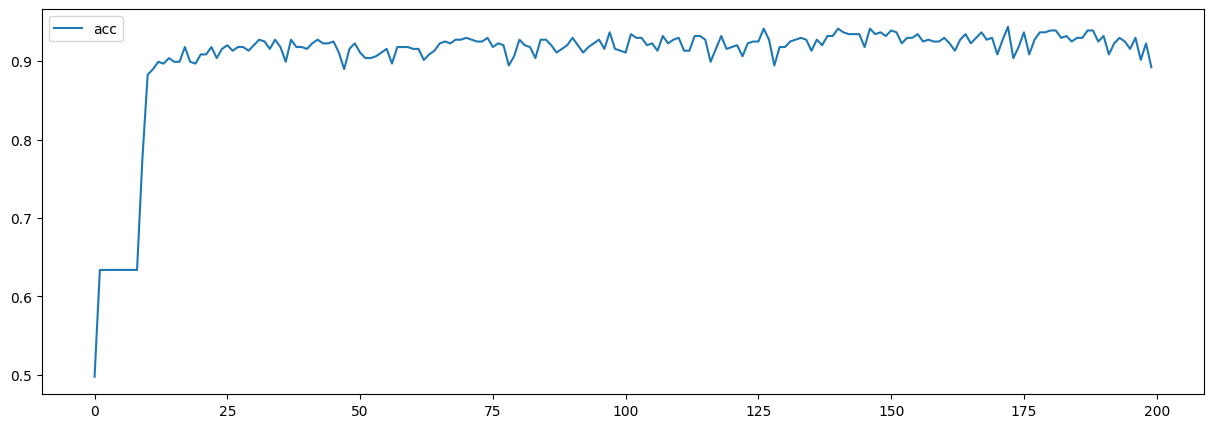

In [24]:
# 3. 시각화
plt.figure(figsize=(15, 5))

plt.plot(h.history['acc'], label = 'acc')

plt.legend()
plt.show()

In [25]:
# 4. 모델 평가
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.1846 - acc: 0.9301


[0.18458548188209534, 0.9300699234008789]